In [2]:
import wget
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
#from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import re

In [12]:
data= "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
data= wget.download(data)
df_complete= pd.read_csv(data)

100% [..........................................................................] 1423529 / 1423529

# Preparing the dataset

In [13]:
df_complete.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
# Reading and transforming dataset

df = df_complete.copy()
df = df[(df.ocean_proximity == "INLAND") | (df.ocean_proximity == "<1H OCEAN")]
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.fillna(0)
df.median_house_value=np.log1p(df.median_house_value)

In [15]:
# Splitting data set 

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df2_train.median_house_value.values
y_val = df2_val.median_house_value.values
y_test = df2_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
     

In [16]:
# Initializing matrixes of features

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [17]:
# Dictvectorizer

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

### Question 1

In [21]:
# Train Decision tree

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [25]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



The variable used for splitting the data is "ocean_proximity"

### Question 2

In [31]:
# Defining RMSE function

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [33]:
# Finding Root Mean Square Error from model

rf = RandomForestRegressor(n_estimators=10, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rmse_q2 = rmse(y_val, y_pred)
rmse_q2    

0.24459962783255346

### Question 3

In [42]:
RMSE =[]

for i in range(10,201,10):
    rf = RandomForestRegressor(n_estimators=i, random_state=1,n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse_q2 = rmse(y_val, y_pred)
    RMSE.append((i,rmse_q2))
    
RMSE

[(10, 0.24459962783255346),
 (20, 0.237804442607681),
 (30, 0.23620701021138027),
 (40, 0.23471508514267608),
 (50, 0.23457644562575608),
 (60, 0.23419687366924183),
 (70, 0.23418713713506897),
 (80, 0.23438796698423958),
 (90, 0.2343044555927512),
 (100, 0.23413013466629137),
 (110, 0.23417386624550823),
 (120, 0.233895354809254),
 (130, 0.23379933611544426),
 (140, 0.23363722554944077),
 (150, 0.23352796531734998),
 (160, 0.23331459938421642),
 (170, 0.23332583790298186),
 (180, 0.23356357894056612),
 (190, 0.23383955969948134),
 (200, 0.2337660799907875)]

In [45]:
columns = ['n_estimators', 'RMSE']
df_rmse = pd.DataFrame(RMSE, columns=columns)
round(df_rmse.sort_values(by=['RMSE'], ascending=False),3)

,n_estimators,RMSE
0,10,0.245
1,20,0.238
2,30,0.236
3,40,0.235
4,50,0.235
7,80,0.234
8,90,0.234
5,60,0.234
6,70,0.234
10,110,0.234


After  n_estimators=10 RMSE stop improving

### Question 4

In [46]:
# dataframe creating

RMSE =[]

for j in [10, 15, 20, 25]:
    for i in range(10,201,10):
        rf = RandomForestRegressor(n_estimators=i, max_depth=j,random_state=1,n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse_q2 = rmse(y_val, y_pred)
        RMSE.append((j,i,rmse_q2))

In [65]:
# Mean RMSE by Max_depth levels 

columns = ['max_depth','n_estimators', 'RMSE']
round(pd.DataFrame(RMSE, columns=columns).groupby('max_depth').mean().reset_index()[["max_depth", "RMSE"]]//
      .sort_values(by=["RMSE"],ascending=False),3)

,max_depth,RMSE
0,10,0.245
1,15,0.236
2,20,0.235
3,25,0.235


the best max_depth, using the mean RMSE is 10

### Question 5

In [127]:
# Model Generation

rf = RandomForestRegressor(n_estimators=10, max_depth=20,random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

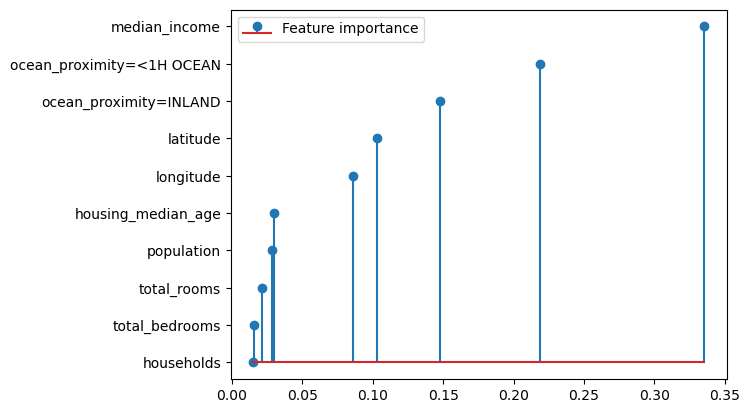

In [128]:
# feature importance comparison

feature_importance = [feature,importances]= dv.feature_names_,rf.feature_importances_
df_feature_importance=pd.DataFrame(feature_importance).transpose().rename(columns={0:"feature",1:"importance"}).sort_values(by=["importance"])
plt.stem(df_feature_importance.importance, df_feature_importance.feature,
             label='Feature importance')
plt.legend()

Median income is the most important feature

### Question 6

In [144]:
# Cleaning and DMatrix inicialization

features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [157]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [172]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        val = float(val_line.split(':')[1])

        results.append((it, val))
    
    columns = ['num_iter', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [173]:
%%capture output


xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [174]:
df_score_03 = parse_xgb_output(output)
df_score_03

,num_iter,val_rmse
0,0,0.44250
1,5,0.27463
2,10,0.25179
3,15,0.24522
4,20,0.23978
5,25,0.23830
6,30,0.23570
7,35,0.23416
8,40,0.23318
9,45,0.23190


In [175]:
%%capture output


xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [176]:
df_score_1 = parse_xgb_output(output)
df_score_1

,num_iter,val_rmse
0,0,0.44250
1,5,0.27463
2,10,0.25179
3,15,0.24522
4,20,0.23978
5,25,0.23830
6,30,0.23570
7,35,0.23416
8,40,0.23318
9,45,0.23190


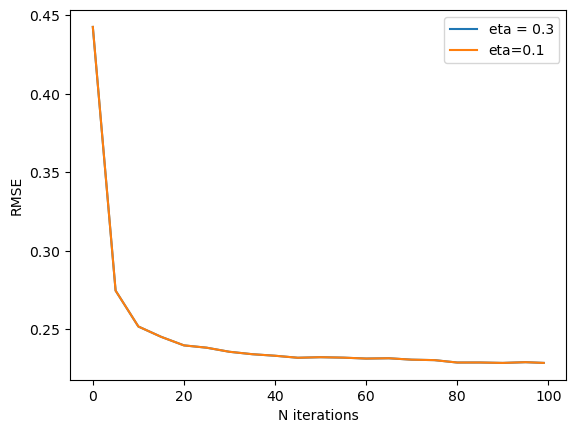

In [179]:
plt.plot(df_score_03.num_iter, df_score_03.val_rmse, label='eta = 0.3')
plt.plot(df_score_03.num_iter, df_score_1.val_rmse, label='eta=0.1')
plt.xlabel("N iterations")
plt.ylabel("RMSE")

plt.legend()

Both give equal value and have an strange shape meaning less iterations produce greater RMSE